In [2]:
import tensorflow as tf

In [3]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [4]:
print(f"Data shape = {train_data.shape}")
print(f"Data sample = {train_data[0]}, size of this sample = {len(train_data[0])} words")
print(f"Label sample = {train_labels[0]}")
print(f"Max_review_length = {max([max(sequence) for sequence in train_data])}")

Data shape = (25000,)
Data sample = [1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32], size of this sample = 2

In [5]:
# Get the actual review words from the integer indices.

word_dict = imdb.get_word_index()
reverse_word_index = dict((value, key) for (key, value) in word_dict.items())
def get_review_words(review_idx):
    return " ".join([reverse_word_index.get(i-3, "?") for i in train_data[review_idx]])

In [6]:
get_review_words(0)

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [7]:
# Vectorizing the data so a neural network can understand it. THat means converting
# everything to float32 values, and in this case, having a fixed input length for every 
# data sample. 

import numpy as np

def vectorize_data(sequences, vector_size=10000):
    vectorized = np.zeros((len(sequences), vector_size))
    for row_idx, sequence in enumerate(sequences):
        for word_idx in sequence:
            vectorized[row_idx, word_idx] = 1
    return vectorized

In [8]:
x_train = vectorize_data(train_data)
x_test = vectorize_data(test_data)
y_train = np.asarray(train_labels).astype(np.float32)
y_test = np.asarray(test_labels).astype(np.float32)

In [9]:
print(x_train[0])
print(y_train[0])

[0. 1. 1. ... 0. 0. 0.]
1.0


In [10]:
indices_permutation = np.random.permutation(len(x_train))
shuffled_inputs = x_train[indices_permutation]
shuffled_targets = y_train[indices_permutation]

In [11]:
# Train - Validation split
x_val = shuffled_inputs[:10000]
partial_x_train = shuffled_inputs[10000:]
y_val = shuffled_targets[:10000]
partial_y_train = shuffled_targets[10000:]

In [12]:
# Building the model

from tensorflow import keras
from keras import layers

movie_review_model = keras.Sequential([
    layers.Dense(32, activation=keras.activations.relu),
    # layers.Dense(4, activation=keras.activations.relu),
    # layers.Dense(16, activation=keras.activations.relu),
    layers.Dense(1, activation=keras.activations.sigmoid)
])

# movie_review_model.compile(optimizer=keras.optimizers.RMSprop,
#                             loss=keras.losses.binary_crossentropy,
#                             metrics=[keras.metrics.Accuracy])

movie_review_model.compile(optimizer=keras.optimizers.RMSprop(learning_rate=0.001),
            #   loss="binary_crossentropy",
              loss=keras.losses.binary_crossentropy,
              metrics=["accuracy"])
                        

Metal device set to: Apple M1 Pro

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB



2022-03-04 09:13:00.805383: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-03-04 09:13:00.805502: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [13]:
history = movie_review_model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20


2022-03-04 09:13:01.814637: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-03-04 09:13:02.262722: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


30/30 [==============================] - 3s 42ms/step - loss: 0.4881 - accuracy: 0.7898 - val_loss: 0.3652 - val_accuracy: 0.8770
Epoch 2/20
 1/30 [>.............................] - ETA: 0s - loss: 0.3078 - accuracy: 0.9219

2022-03-04 09:13:05.012247: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


30/30 [==============================] - 0s 16ms/step - loss: 0.2945 - accuracy: 0.9057 - val_loss: 0.3390 - val_accuracy: 0.8653
Epoch 3/20
30/30 [==============================] - 0s 15ms/step - loss: 0.2237 - accuracy: 0.9301 - val_loss: 0.2788 - val_accuracy: 0.8965
Epoch 4/20
30/30 [==============================] - 0s 15ms/step - loss: 0.1816 - accuracy: 0.9419 - val_loss: 0.2765 - val_accuracy: 0.8924
Epoch 5/20
30/30 [==============================] - 0s 15ms/step - loss: 0.1501 - accuracy: 0.9548 - val_loss: 0.2768 - val_accuracy: 0.8954
Epoch 6/20
30/30 [==============================] - 0s 15ms/step - loss: 0.1269 - accuracy: 0.9633 - val_loss: 0.2847 - val_accuracy: 0.8926
Epoch 7/20
30/30 [==============================] - 0s 15ms/step - loss: 0.1087 - accuracy: 0.9701 - val_loss: 0.3223 - val_accuracy: 0.8799
Epoch 8/20
30/30 [==============================] - 0s 14ms/step - loss: 0.0964 - accuracy: 0.9728 - val_loss: 0.3130 - val_accuracy: 0.8859
Epoch 9/20
30/30 [======

In [14]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

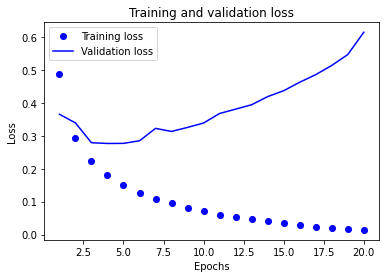

In [15]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

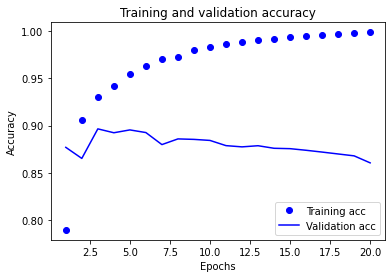

In [16]:
# plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [17]:
results = movie_review_model.evaluate(x_test, y_test)
results

782/782 [==============================] - 5s 7ms/step - loss: 0.6775 - accuracy: 0.8438


[0.6774938106536865, 0.8438400626182556]

In [18]:
# The first number, 0.29, is the test loss, and the second number, 0.88, is the test accuracy.
# 3 layers: [0.764792263507843, 0.8493600487709045]
# 2 layers: [0.531110942363739, 0.8519600629806519]
# 4 layers: [0.8898702263832092, 0.8500800728797913]
# 3 layers. base, diff 32,16,1 [0.8254880309104919, 0.8500000834465027]
# 2 layers. base, diff 32, 1 [0.6107428669929504, 0.8531200289726257]
# 2 layers. base, diff 64, 1 [0.712183952331543, 0.8508800268173218]
# 3 layers. base, diff 32, 4, 1 [0.6724256873130798, 0.8529600501060486]

# Selected 2 layers, base diff 32, 1. It has the lowest test loss, and highest test accuracy. [0.6107428669929504, 0.8531200289726257]
# We will call this the 2 layer model. 2lm [0.6107428669929504, 0.8531200289726257]
# 2lm + tanh instead of reLu in layer 1.   [0.8433620929718018, 0.8409200310707092]
# 2lm + mse instead of bce. [0.12561532855033875, 0.8486800789833069] Interesting drop in test error. But is it measured the same way?
# 2lm + relu + RMSProp (LR = 0.1) [1.0009647607803345, 0.8468000292778015]
# 2lm + relu + RMSProp (LR = 0.001) [0.6408697962760925, 0.8476000428199768]

#  [0.6129429936408997, 0.8525600433349609]

In [19]:
history_3epochs = movie_review_model.fit(partial_x_train,
                    partial_y_train,
                    epochs=3,
                    batch_size=512,
                    validation_data=(x_val, y_val))
results_3epochs = movie_review_model.evaluate(x_test, y_test)
results_3epochs
# MUCH better results when overfitting is prevented. [0.30312463641166687, 0.8782800436019897]

Epoch 1/3
30/30 [==============================] - 1s 34ms/step - loss: 0.0119 - accuracy: 0.9992 - val_loss: 0.5954 - val_accuracy: 0.8676
Epoch 2/3
30/30 [==============================] - 0s 17ms/step - loss: 0.0100 - accuracy: 0.9995 - val_loss: 0.6190 - val_accuracy: 0.8665
Epoch 3/3
782/782 [==============================] - 5s 6ms/step - loss: 0.7091 - accuracy: 0.8498


[0.7090955376625061, 0.8497600555419922]